In [1]:
# !pip install pyrosm
# !pip install pandana
# !pip install -U google-cloud-aiplatform "shapely<2"

In [3]:
from pyrosm import OSM, get_data
from pyrosm.data import sources
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

#get data of the city, region or country of interest
osm = OSM(get_data("Toronto"))

# # Prints a list of all cities that can be downloaded
# print(sources.cities.available)

In [4]:
nodes, edges = osm.get_network(network_type="driving", nodes=True)
hospitals = osm.get_pois({"amenity": ["hospital"]})
# restaurants = osm.get_pois(custom_filter={"amenity": ["restaurant"]})
# buildings = osm.get_buildings()

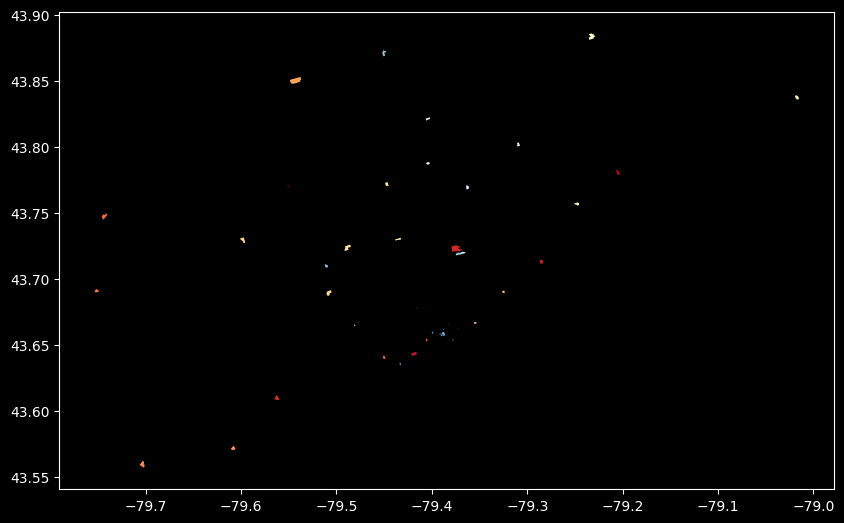

In [5]:
# Visualize the results
plt.style.use('dark_background') # for other available styles use: plt.style.available[:5]
ax = hospitals.plot(cmap='RdYlBu', markersize=0.1, legend=True, figsize=(10, 10))

In [6]:
# getting pandana Network object
G = osm.to_graph(nodes, edges, graph_type='pandana')

In [7]:
# Ensure all hospitals are represented as points
hospitals['geometry'] = hospitals.centroid
hospitals = hospitals.dropna(subset=['lon', 'lat'])

In [8]:
# Precompute distances up to 1000 meters 
G.precompute(1000)

In [9]:
# Attach hospitals to Pandana graph
G.set_pois(category='hospitals', maxdist=1000, maxitems=10, 
           x_col=hospitals.lon, y_col=hospitals.lat)

In [10]:
# For each node in the network, find distances to 5 closest hospitals up to 1000 meters using fast contraction hierarchies algorithm implemented in Pandana
nearest_five = G.nearest_pois(1000, "hospitals", num_pois=5)
nearest_five.tail(10)

,1,2,3,4,5
11629669269,1000.0,1000.0,1000.0,1000.0,1000.0
11629669270,1000.0,1000.0,1000.0,1000.0,1000.0
11630845947,1000.0,1000.0,1000.0,1000.0,1000.0
11630845950,1000.0,1000.0,1000.0,1000.0,1000.0
11630845948,1000.0,1000.0,1000.0,1000.0,1000.0
11630845952,1000.0,1000.0,1000.0,1000.0,1000.0
11630845954,1000.0,1000.0,1000.0,1000.0,1000.0
11630845953,1000.0,1000.0,1000.0,1000.0,1000.0
280215544,1000.0,1000.0,1000.0,1000.0,1000.0
280215545,1000.0,1000.0,1000.0,1000.0,1000.0
